## 4개월 간 s-마트의 영수증 데이터를 이용하여 마케팅 전략을 수립하려 한다.

s_mart.csv

|컬럼|정의|type|
|:---|:---|:---:|
|goods|상품 구매 수|int64|
|purchases|결제 총 금액|float64|
|parking|주차 여부 (값이 0이면 주차하지 않음, 1이면 주차하였음)|int64|
|rental_bag|장바구니 대여 여부(값이 0이면 대여하지 않음, 1이면 소형 사이즈 대여, 2면 대형 사이즈 대여)|int64|
|date|결제 날짜|object|  

정답 및 해설 : https://tjd229.tistory.com/21

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('../content/tjd229/s_mart.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8043 entries, 0 to 8042
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   goods       8043 non-null   int64  
 1   purchases   6654 non-null   float64
 2   parking     8043 non-null   int64  
 3   rental_bag  8043 non-null   int64  
 4   date        8043 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 314.3+ KB


In [2]:
df.shape

(8043, 5)

In [3]:
df.describe()

,goods,purchases,parking,rental_bag
count,8043.000000,6.654000e+03,8043.000000,8043.000000
mean,15.474326,1.548129e+05,0.486137,1.202785
std,9.249488,1.675084e+05,0.499839,0.872374
min,0.000000,0.000000e+00,0.000000,0.000000
25%,7.000000,5.190750e+04,0.000000,0.000000
50%,15.000000,1.080450e+05,0.000000,2.000000
75%,23.000000,1.858050e+05,1.000000,2.000000
max,31.000000,1.430040e+06,1.000000,2.000000


In [4]:
df.head()

,goods,purchases,parking,rental_bag,date
0,25,96120.0,0,2,2023-02-07
1,13,49710.0,0,2,2022-11-18
2,28,247380.0,1,2,2023-02-20
3,3,174430.0,1,0,2022-12-10
4,8,35510.0,0,1,2022-11-19


### Q1. 여러 변수간 상관관계를 확인하고자 한다. 상품 구매 수(goods), 결제 총 금액(purchases), 주차 여부(parking), 장바구니 대여 여부(rental_bag)간 피어슨 상관분석을 수행하고 그 결과 중 상관계수 절대값이 가장 큰 값을 구하시오
※ 결측값이 포함된 데이터는 제거한 후에 상관분석을 수행하시오  
※ 정답은 반올림하여 소수점 첫째 자리까지 출력하시오.
(정답 예시: 22.9)

In [5]:
df.columns

Index(['goods', 'purchases', 'parking', 'rental_bag', 'date'], dtype='object')

 👉 df.corr()

In [6]:
df_corr = df[['goods', 'purchases', 'parking', 'rental_bag']].dropna().corr()
df_corr

,goods,purchases,parking,rental_bag
goods,1.000000,0.305037,-0.001237,0.466990
purchases,0.305037,1.000000,0.006664,0.162369
parking,-0.001237,0.006664,1.000000,-0.005597
rental_bag,0.466990,0.162369,-0.005597,1.000000


이 중에서  세번째로 큰값을 찾으려면,  
pd.Series(df_corr.values.reshape(-1)).sort_values(ascending=False).unique()[3]

In [69]:
pd.Series(df_corr.values.reshape(-1)).sort_values(ascending=False).unique()#[3]

array([ 1.        ,  0.46698983,  0.30503692,  0.16236871,  0.00666422,
       -0.00123745, -0.00559709])

In [71]:
# 그 값을 featrue 을 찾으려면?
# 그 값이 true 인 것을 찾으면 된다???

(df_corr==0.16236871280817758).sum()


goods         0
purchases     1
parking       0
rental_bag    1
dtype: int64

In [59]:
df_corr == 0.16236871280817758

# 이값을 갖는 feature 는 뭐야?

,goods,purchases,parking,rental_bag
goods,False,False,False,False
purchases,False,False,False,True
parking,False,False,False,False
rental_bag,False,True,False,False


sns.heatmap(df_corr,annot=True)

<AxesSubplot:>

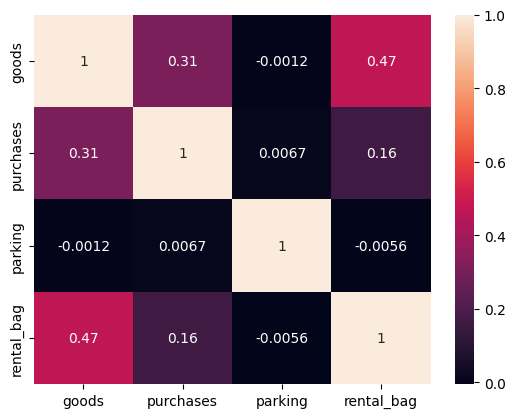

In [8]:
import seaborn as sns
sns.heatmap(df_corr, annot=True )

df.isna().sum()

df 의 결측값 갯수 확인

In [9]:
df1 = df.copy()

df1.isna().sum()   

# purchases 에만 결측 존재


goods            0
purchases     1389
parking          0
rental_bag       0
date             0
dtype: int64

In [10]:
df1_null = df1.loc[df1.purchases.notnull(),]   # null 값 제외 : null 이 아니값만 slicing

print(df1_null.shape)
df1_null.isna().sum()

(6654, 5)


goods         0
purchases     0
parking       0
rental_bag    0
date          0
dtype: int64

Series.corr(method)

In [11]:
df1_null.corr(method='pearson').abs().round(1).goods.sort_values(ascending = False)[1]

# df1_null.corr(method='pearson').abs().round(1).sort_values(by='goods',ascending = False).iat[1,0]

# goods 기준으로 sort 해서 제일 큰수 


0.5

In [12]:
# (abs(df1_null.corr(method='pearson')).goods.sort_values(ascending = False)).index.values[1]
df1_null.corr(method='pearson').abs().round(1).sort_values(by='goods',ascending = False).index[1]
# goods 와 상관관계가 제일 큰수를 갖은 column 

'rental_bag'

👉 series.iat[1], index[1]

2번째값, 2번째 인텍스

In [13]:
df1_null.corr(method='pearson').goods.abs().sort_values( ascending =False).iat[1].round(1)

0.5

In [14]:
df1_null.corr(method='pearson').goods.abs().sort_values( ascending =False).index[1]

'rental_bag'

### Q2. 특정 날짜 사이의 결제 총 금액(purchases) 평균을 구하려고 한다. 다음 단계에 따라 분석을 수행하고 질문에 답하시오.

단계 1 : 결측값(Null)이 포함된 모든 행을 제거하시오  
단계 2 : 단계 1을 수행한 데이터에서 결제 총 금액(purchases)이 49710인 날짜 st, 결제 총 금액(purchases)이 96120인 날짜 ed를 구한다.  
- st와 ed 조건을 만족하는 데이터는 유일하다.

단계 3 : 단계 2에서 구한 st와 ed 날짜 사이의 결제 총 금액(purchases) 평균을 구하시오(st와 ed 날도 포함한다.)  
  
※ 정답은 반올림하여 소수점 셋째 자리까지 출력하시오.
(정답 예시: 0.229)

 👉 df.dropna(how / inplace)  

 axis = 0/1 or 'index'/'columns'

0 or 'index' -> NaN 값이 포함된 row를 drop (default 값입니다.)  
1 or 'columns' -> NaN 값이 포함된 column을 drop   

how = 'any'/'all'  
any -> row 또는 column에 NaN값이 1개만 있어도 drop (default 값입니다.)  
all -> row 또는 column에 있는 모든 값이 NaN이어야 drop   

inplace = True/False  
True -> dropna가 적용된 DataFrame 자체에 dropna를 적용  
False -> dropna가 적용된 DataFrame는 그대로 두고 dropna를 적용한 DataFrame을 return   

subset = [col1, col2, ...]  
subset을 명시하지 않으면 DataFrame 전체(모든 column & 모든 row)에 대해 dropna를 진행  
subset을 명시하면 subset에 적힌 column값에 대해서만 dropna를 진행  

df2 = df2.loc[df2.notnull(),:] 

In [15]:
df2 =df.copy()
df2.dropna(how ='any',inplace=True)     # 결측값 하나라도 있으면 제거 
df2.isnull().sum()

# df2 = df2.loc[df2.notnull(),:]        # 결측값이 아니값만 취합

goods         0
purchases     0
parking       0
rental_bag    0
date          0
dtype: int64

In [16]:
df2.tail()

,goods,purchases,parking,rental_bag,date
8037,22,95230.0,1,2,2022-12-08
8038,9,75870.0,0,1,2022-11-28
8039,21,159070.0,1,2,2022-12-20
8040,10,92720.0,0,0,2023-01-18
8041,13,764510.0,1,0,2023-01-05


In [17]:
df2.info()

# 중간에 drop 된 index 가 있어서 
# Int64Index: 6654 entries, 0 to 8041 
# 으로 표시 된다.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6654 entries, 0 to 8041
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   goods       6654 non-null   int64  
 1   purchases   6654 non-null   float64
 2   parking     6654 non-null   int64  
 3   rental_bag  6654 non-null   int64  
 4   date        6654 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 311.9+ KB


loc / iloc

In [18]:
# drop 을 실행한 후 location index 와 lable index 가 트러졌다. (그래서 reset_index가 필요함.)

print(df2.iloc[6653,])  # 6654 번째 location index 
print(df2.loc[8041,])   # reset index 을 해서 아직 8041 label index 가 살아 있다.

goods                 13
purchases       764510.0
parking                1
rental_bag             0
date          2023-01-05
Name: 8041, dtype: object
goods                 13
purchases       764510.0
parking                1
rental_bag             0
date          2023-01-05
Name: 8041, dtype: object


👉 reset_index(inplace, drop)

reset index 이후 labe index 가 position index 로 맞워저서   
df2.loc[8041,] 는 오류가 남

In [19]:
df2.reset_index(inplace = True ,drop = True)
df2.info()

# 인텍스를 다시 설정 0 ~ 6654
# print(df2.loc[8041,]) 는 오류 발생

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6654 entries, 0 to 6653
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   goods       6654 non-null   int64  
 1   purchases   6654 non-null   float64
 2   parking     6654 non-null   int64  
 3   rental_bag  6654 non-null   int64  
 4   date        6654 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 260.0+ KB


In [20]:
df2.tail()

,goods,purchases,parking,rental_bag,date
6649,22,95230.0,1,2,2022-12-08
6650,9,75870.0,0,1,2022-11-28
6651,21,159070.0,1,2,2022-12-20
6652,10,92720.0,0,0,2023-01-18
6653,13,764510.0,1,0,2023-01-05


In [21]:
df2.loc[df2.purchases == 49710, ]

# 원래부터가 index 가 1 이였네.

,goods,purchases,parking,rental_bag,date
1,13,49710.0,0,2,2022-11-18


😂 label vs position indexing
```
label    : loc, 명시적, 몇번 df, series 로 반환, at : 값을 가져온다
position : iloc, 암묵적, 몇번째 (추가/삭제에 따라 변화) df,series 로 반환 , iat : 값만 을 가져온다
```

In [22]:

# st = df2.loc[df2.purchases == 49710, 'date'][1]      
# df 때부터 있던 원래 label 인덱스 [1] 를 넣어야 한다. 여기서는 우연히 0, 1 이라서 혼동됨
# [int] 인경우 lable (명목적) 인덱스로 간주한다. 

st = df2.loc[df2.purchases == 49710, 'date'].values[0]
st

# df2.loc[df2.purchases == 49710, 'date'] 은 왜 안될까?  Serise 라서
# 와
# df2.loc[df2.purchases == 49710, 'date'][0] 은 왜 안될까? [1] 이여만 할까? --> df 에서부터 갖고 있는 원래 label 인덱스[1] 를 넣어야 한다.

'2022-11-18'

In [23]:
# position을 사용하기 위해서는 iloc 을 사용해야 한다. 

df2.loc[df2.purchases == 49710, 'date'].iloc[0]

'2022-11-18'

In [24]:
print(df2.loc[df2.purchases == 96120, ['date']])
ed = df2.loc[df2.purchases == 96120, 'date'].values[0]
ed

# ed = df2.loc[df2.purchases == 96120, 'date'][1] 여기는 왜 이게 안될까? --> lable index 1 인 값이 없기 때문에 

         date
0  2023-02-07


'2023-02-07'

In [25]:
df2.loc[df2.purchases == 96120, 'date'].iloc[0]

'2023-02-07'

In [26]:
mask = (df2['date'] >= st) & (df2['date'] <= ed)
df2.loc[mask,'purchases']

0        96120.0
1        49710.0
3       174430.0
4        35510.0
5        90330.0
          ...   
6649     95230.0
6650     75870.0
6651    159070.0
6652     92720.0
6653    764510.0
Name: purchases, Length: 4609, dtype: float64

### Q3. 데이터를 바탕으로 장바구니 대여 여부(rental_bag)를 예측하는 모델을 만드려고 한다. 다음 단계에 따라 분석을 수행하고 질문에 답하시오.

단계 1 : 결제 총 금액(purchases)의 결측 값(Null)을 결제 총 금액(purchases)의 평균값으로 대체한다.  
단계 2 : 장바구니 대여 여부(rental_bag) 컬럼 값을 대여하지 않은 경우는 0, 대여한 경우는 종류에 상관없이 1로 변환한다.  


In [27]:
df3 = df.copy()
df3.isna().sum()

goods            0
purchases     1389
parking          0
rental_bag       0
date             0
dtype: int64

df.fillna(method)

method = ffill, bfill  / limit = 갯수 만큼만 채우기  

df.fillna(df.mean()['C1'])       : C1 평균으로 모든 결측값 채우기  

df.fillna(df.mean()['C1':'C2'])  : C1, C2  각각의 평균값으로 각각의 컬럼의 결측값 채우기  
```
df_2['C2_New'] = np.where(pd.notnull(df_2['C2']) == True,       C2에 값이 있으면,   
                          df_2['C2'], df_2['C1'])               C2값을, 값이 없을때 C1 값으로 C2_New 을 채움  
```


In [28]:
df3.fillna(df3.purchases.mean(), inplace=True)

In [29]:
df3.isna().sum()

goods         0
purchases     0
parking       0
rental_bag    0
date          0
dtype: int64

In [30]:
df3.rental_bag.unique()

array([2, 0, 1])

In [31]:
df3.loc[df3.rental_bag == 2,'rental_bag'] = 1

In [32]:
df3.rental_bag.unique()

array([1, 0])

In [33]:
df3.head()

,goods,purchases,parking,rental_bag,date
0,25,96120.0,0,1,2023-02-07
1,13,49710.0,0,1,2022-11-18
2,28,247380.0,1,1,2023-02-20
3,3,174430.0,1,0,2022-12-10
4,8,35510.0,0,1,2022-11-19


단계 3 : 날짜가 2월이 아닌 데이터를 Train Set으로, 2월인 데이터를 Test Set으로 분할한다.  


pd.to_datetime

In [42]:
# Test_d = df3.loc[df3.date.str[5:7] == '02',]
# Train_d = df3.loc[df3.date.str[5:7] != '02',]

df3['date'] = pd.to_datetime(df3['date'])
Train_d = df3.loc[df3['date'].dt.month!=2,].copy()
Test_d = df3.loc[df3['date'].dt.month==2,].copy()

😂 SettingWithCopyWarning

기존 데이터의 일부를 새로운 데이터를 사용할때는 copy 을 해서 사용해야 한다. 
Train_d = df3.loc[df3['date'].dt.month!=2].copy() 

이후 Train_d 의 수정이 필요하게 될때, copy을 하지 않은 경우 원본까지 수정을 해야 하는지 애매해서 경고 SettingWithCopyWarning 가 발생한다.
```
Train_d = df3.loc[df3['date'].dt.month!=2]   일 경우,  
...
std_train = StandardScaler()
Train_d.loc[:,['goods','purchases']] = std_train.fit_transform(Train_d.loc[:,['goods','purchases']])  <-- 경고 발생
```

In [35]:
# Train_d.loc[Train_d.date.str[5:7]=='02',]
Train_d.count(), Test_d.count()

(goods         6248
 purchases     6248
 parking       6248
 rental_bag    6248
 date          6248
 dtype: int64,
 goods         1795
 purchases     1795
 parking       1795
 rental_bag    1795
 date          1795
 dtype: int64)

단계 4 : 상품 구매 수(goods)와 결제 총 금액(purchases) 컬럼에 대해 Train Set을 기준으로 Z-score 표준화(Standardization) 한다.  


In [1]:
from sklearn.linear_model import LogisticRegression  
from sklearn.preprocessing import StandardScaler  
from sklearn.metrics import f1_score

👉 data scaling : StandardScaler

In [36]:
std_train = StandardScaler()
Train_d.loc[:,['goods','purchases']] = std_train.fit_transform(Train_d.loc[:,['goods','purchases']])

# test 는  train 기준 StandardScaler fit 을 이용하여 transform 만 한다. 
Test_d.loc[:,['goods','purchases']] = std_train.transform(Test_d.loc[:,['goods','purchases']])
Train_d, Test_d

(         goods  purchases  parking  rental_bag       date
 1    -0.274207  -0.692843        0           1 2022-11-18
 3    -1.353346   0.140439        1           0 2022-12-10
 4    -0.813776  -0.787716        0           1 2022-11-19
 5     0.049535  -0.421452        0           0 2022-12-21
 6     0.157449  -0.464746        1           1 2022-12-02
 ...        ...        ...      ...         ...        ...
 8038 -0.705863  -0.518062        0           1 2022-11-28
 8039  0.589105   0.037816        1           1 2022-12-20
 8040 -0.597949  -0.405483        0           0 2023-01-18
 8041 -0.274207   4.082896        1           0 2023-01-05
 8042  0.373277   0.009373        0           1 2023-01-11
 
 [6248 rows x 5 columns],
          goods  purchases  parking  rental_bag       date
 0     1.020761  -0.382767        0           1 2023-02-07
 2     1.344503   0.627835        1           1 2023-02-20
 7     1.560331   0.405684        0           1 2023-02-21
 8     0.589105  -0.476839  

단계 5 : Train Set으로 아래 조건에 따라 로지스틱 회귀분석을 학습한다.  
- 독립 변수 : 상품 구매 수(goods), 결제 총 금액(purchases), 주차 여부(parking)  
- 종속 변수 : 장바구니 대여 여부(rental_bag)  


👉 LogisticRegression

In [37]:
X_train = Train_d[['goods','purchases','parking']]   # 독립변수는 1개라도 [[ ]] 이다.
X_test = Test_d[['goods','purchases','parking']] 

y_train = Train_d['rental_bag']                      # 종속변수는 1개라서 [[ ]] 가 아니다
y_test = Test_d['rental_bag']

Log_model = LogisticRegression(random_state=229)
Log_model.fit(X_train, y_train)

y_pred = Log_model.predict(X_test)


In [38]:
score = f1_score(y_test, y_pred)

score

0.822771941714673


단계 6 : 단계 5에서 학습한 모델을 Test Set에 적용하여 장바구니 대여 여부(rental_bag)를 예측한다. Test Set에 주어진 종속 변수를 활용하여 F1-score로 모델을 평가하시오  
            
※ 정답은 반올림하여 소수점 둘째 자리까지 출력하시오.  
(정답 예시: 2.29)

#### 필요 라이브러리 함수,클래스 및 설정값 목록  


from sklearn.linear_model import LogisticRegression  
from sklearn.preprocessing import StandardScaler  
from sklearn.metrics import f1_score  
random_state = 229  
문제 지시 외 Default 값 사용  